<a href="https://colab.research.google.com/github/evertonsilvauea/trabalho_estatistica/blob/main/pcorrea-esilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import statistics as st
from scipy import stats
from collections import Counter
import math


In [2]:
# Install git lfs first so we can get download model checkpoints
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 6,540 kB of archives.
After this operation, 15.3 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.13.1 [6,540 kB]
Fetched 6,540 kB in 1s (8,710 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 144869 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.13.1_a

In [3]:
!git clone https://github.com/evertonsilvauea/trabalho_estatistica


Cloning into 'trabalho_estatistica'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 31 (delta 10), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [4]:
%cd trabalho_estatistica


/content/trabalho_estatistica


In [5]:
%ls

 analise-temporal-base-anac-maisa.ipynb          'Lista de Exercícios.ipynb'
 chegadas_2017.csv                                pcorrea-esilva.ipynb
 chegadas_2018.csv                                README.md
 chegadas_2019.csv                                Trabalho_Estatística.ipynb
 DadosEstatisticos-com-colunas-de-interesse.csv


## Base de dados

In [6]:
dataset = pd.read_csv('DadosEstatisticos-com-colunas-de-interesse.csv',sep=';',encoding = 'latin-1')
dataset.dropna()


,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,HORAS VOADAS,BAGAGEM (KG)
342,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SBSV,SALVADOR,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,12.0,1.0,0.0,0.0,537.0,1.0,15.0,"1,52",120.0
343,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SNTF,TEIXEIRA DE FREITAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,1.0,0.0,0.0,0.0,368.0,8.0,120.0,"2,73",0.0
344,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBLP,BOM JESUS DA LAPA,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SBSV,SALVADOR,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,68.0,1.0,3.0,0.0,3864.0,7.0,105.0,"12,93",579.0
345,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBLP,BOM JESUS DA LAPA,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SNGI,GUANAMBI,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,2.0,54.0,0.0,1778.0,14.0,210.0,"8,17",0.0
346,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBSV,SALVADOR,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,4.0,1.0,0.0,0.0,537.0,1.0,15.0,"1,65",15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886460,VDA,VOLGA DNEPR AIRLINES,ESTRANGEIRA,2020,8,SBBR,BRASÍLIA,DF,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,798.0,1.0,0.0,"1,333",0.0
886489,VVC,VIVAAIR - FASTCOLOMBIA,ESTRANGEIRA,2020,7,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,8091.0,3.0,564.0,"12,417",0.0
886494,VVC,VIVAAIR - FASTCOLOMBIA,ESTRANGEIRA,2020,8,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,2697.0,1.0,188.0,"3,967",0.0
886501,WAL,CARIBBEAN SUN AIRLINES DBA WORLD ATLANTIC AIRL...,ESTRANGEIRA,2020,5,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,2697.0,1.0,155.0,"3,5",0.0


## Gráfico de dispersão

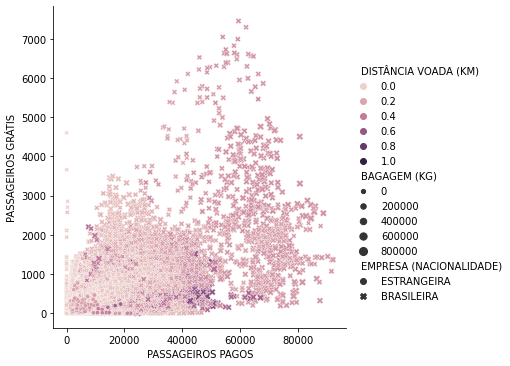

In [7]:
# fig = plt.figure(figsize=(40,10))
# plt.title('Gráfico de Dispersão', fontsize=40)
# sns.relplot(x = 'PAYLOAD', y = 'ASSENTOS', data=dataset,
#             hue = 'EMPRESA (NACIONALIDADE)', style = 'EMPRESA (NACIONALIDADE)', size = 'BAGAGEM (KG)');
sns.relplot(x = 'PASSAGEIROS PAGOS', y = 'PASSAGEIROS GRÁTIS', data=dataset,
            hue = 'DISTÂNCIA VOADA (KM)', style = 'EMPRESA (NACIONALIDADE)', size = 'BAGAGEM (KG)');

## Gráfico de barra e setor (pizza)

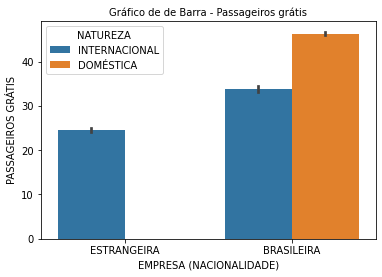

In [21]:
# sns.relplot(x = 'age', y = 'final-weight', data=dataset,
#             hue = 'income', style = 'sex', size = 'education-num');
plt.title('Gráfico de de Barra - Passageiros grátis', fontsize=10)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS GRÁTIS', data=dataset, hue = 'NATUREZA');

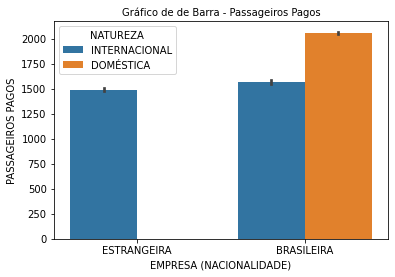

In [22]:
plt.title('Gráfico de de Barra - Passageiros Pagos', fontsize=10)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS PAGOS', data=dataset, hue = 'NATUREZA');

In [23]:
dados_agrupados = dataset.groupby(['EMPRESA (NACIONALIDADE)'])['BAGAGEM (KG)'].sum()
dados_agrupados

EMPRESA (NACIONALIDADE)
BRASILEIRA     1.666200e+10
ESTRANGEIRA    0.000000e+00
Name: BAGAGEM (KG), dtype: float64

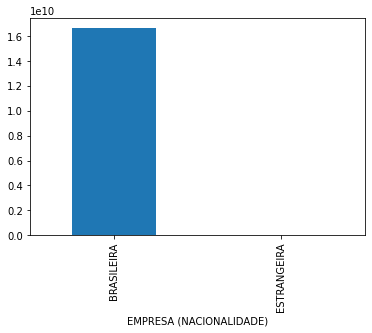

In [24]:
dados_agrupados.plot.bar();

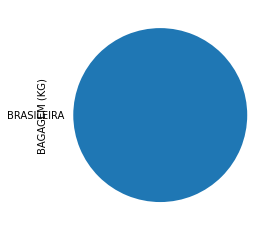

In [25]:
dados_agrupados.plot.pie();

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


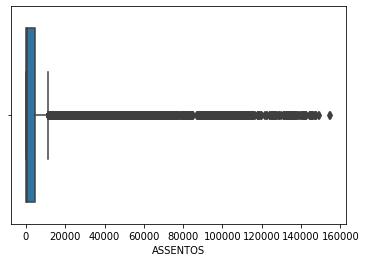

In [26]:
sns.boxplot(dataset.ASSENTOS);

##Quantidade de voos que partem de Manaus para cada destino

In [12]:
dataset_manaus = dataset[dataset['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'] 
#dataset_manaus.head()
dataset_manaus2= dataset_manaus['AEROPORTO DE DESTINO (NOME)'].value_counts().to_frame()
dataset_manaus2.head(10)

,AEROPORTO DE DESTINO (NOME)
GUARULHOS,1886
BELÉM,1522
BRASÍLIA,1262
SANTARÉM,1180
"MIAMI, FLORIDA",1175
BOGOTÁ,1162
CAMPINAS,1078
RIO DE JANEIRO,1025
PORTO VELHO,1001
BOA VISTA,980


##Mediana, Média, Moda e Desvio Padrão - Manaus

In [31]:
_res = 0
bagagens = []
for x in dataset_manaus['BAGAGEM (KG)']:
  # i = i + 1
  if not math.isnan(x) and x != 0.0:
    _res = _res + x
    
    bagagens.append(x)

# bagagens = [1,2,3,23,3435,23,5342
print(f'total de passageiros pagos é {round(_res)} \n{len(bagagens)}\n{bagagens}')

print(f'A mediana de passageiros é {round(st.median(bagagens))}')
print(f'A média de passageiros é {round(st.mean(bagagens))}')
print(f'A moda de passageiros é {round(st.mode(bagagens))}')
print(f'A desvio padrão de passageiros é {round(st.pstdev(bagagens))}')

total de passageiros pagos é 308362084 
18260
[49.0, 675.0, 11848.0, 626.0, 9479.0, 702.0, 6512.0, 4374.0, 17.0, 10120.0, 14603.0, 32453.0, 19461.0, 16000.0, 705.0, 21528.0, 23599.0, 167.0, 3744.0, 666.0, 1174.0, 712.0, 218.0, 12.0, 4391.0, 364.0, 576.0, 113.0, 261.0, 110.0, 3373.0, 503.0, 1208.0, 277.0, 114.0, 99.0, 3802.0, 406.0, 612.0, 761.0, 80.0, 308.0, 5723.0, 540.0, 1751.0, 524.0, 447.0, 294.0, 4964.0, 645.0, 942.0, 579.0, 30.0, 127.0, 4712.0, 634.0, 391.0, 980.0, 396.0, 289.0, 157.0, 4235.0, 462.0, 749.0, 528.0, 286.0, 121.0, 68.0, 3572.0, 269.0, 405.0, 841.0, 144.0, 130.0, 10.0, 4101.0, 482.0, 618.0, 558.0, 325.0, 258.0, 41.0, 4735.0, 1085.0, 575.0, 572.0, 379.0, 48.0, 147.0, 3855.0, 887.0, 477.0, 1258.0, 423.0, 172.0, 83.0, 3349.0, 4436.0, 121.0, 1918.0, 210.0, 3041.0, 266.0, 3842.0, 4794.0, 168.0, 2201.0, 937.0, 1109.0, 1476.0, 996.0, 1019.0, 1366.0, 983.0, 1451.0, 48.0, 1257.0, 1361.0, 1769.0, 748.0, 3590.0, 6374.0, 92.0, 52.0, 2492.0, 20.0, 646.0, 1918.0, 1697.0, 1983.0, 2

##Voos que parte de Manaus

In [99]:
count_manaus = dataset[dataset['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'].value_counts().to_frame()
print(len(count_manaus))
count_manaus.head()

14456


,,,,,,,,,,,,,,,,,,,,,,,,,,,0
EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,HORAS VOADAS,BAGAGEM (KG),
PEP,PENTA,BRASILEIRA,2004,9,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBSN,SANTARÉM,PA,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,589.0,1.0,0.0,"1,9",0.0,2
TTL,TOTAL LINHAS AÉREAS S.A.,BRASILEIRA,2002,6,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,0.0,1.0,47.0,"2,5",0.0,2
MEL,MEGA LINHAS AÉREAS LTDA.,BRASILEIRA,2007,1,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SWEU,CARACARAÍ,RR,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,463.0,1.0,0.0,"1,2",0.0,2
RLE,RICO,BRASILEIRA,2000,10,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBUA,SÃO GABRIEL DA CACHOEIRA,AM,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,4.0,0.0,1158.0,0.0,835.0,1.0,18.0,"2,47",55.0,2
TTL,TOTAL LINHAS AÉREAS S.A.,BRASILEIRA,2016,11,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,0.0,1.0,48.0,"0,42",0.0,2


In [ ]:
# plt.bar(count_manaus.index,dataset[dataset['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'])
# plt.show()

count_manaus.plot.bar()

##Classificação de voos

Text(0.5, 1.0, 'Classificação de voos')

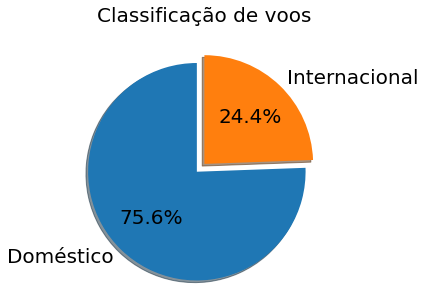

In [97]:
plt.rcParams.update({'font.size':20})
label = ['Doméstico', 'Internacional']
x = dataset.groupby(by='NATUREZA').size()
explode = (0.1,0)
plt.figure(figsize=(5,5))
plt.pie(x=x, labels=label,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Classificação de voos',fontsize=20)

##Mediana, Média, Moda e Desvio Padrão




In [109]:
newdataset = dataset.dropna()

dataset_manaus_value = newdataset.iloc[:]['PASSAGEIROS PAGOS']
print(dataset_manaus_value)
i = 0
res = 0
for x in dataset_manaus_value:
  i = i + 1
  #print(x)
  res = res + int(x)
print(f'total de passageiros pagos é {res}')

print(f'A mediana de passageiros é {round(st.median(dataset_manaus_value))}')
print(f'A média de passageiros é {round(st.mean(dataset_manaus_value))}')
print(f'A moda de passageiros é {round(st.mode(dataset_manaus_value))}')
print(f'A desvio padrão de passageiros é {round(st.pstdev(dataset_manaus_value))}')
#print(f'A moda de passageiros é {st.multimode(dataset_manaus_value)}')

342       12.0
343        1.0
344       68.0
345        0.0
346        4.0
          ... 
886460     0.0
886489     0.0
886494     0.0
886501     0.0
886503     0.0
Name: PASSAGEIROS PAGOS, Length: 477838, dtype: float64
total de passageiros pagos é 1267349974
A mediana de passageiros é 447
A média de passageiros é 2652
A moda de passageiros é 0
A desvio padrão de passageiros é 5482


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


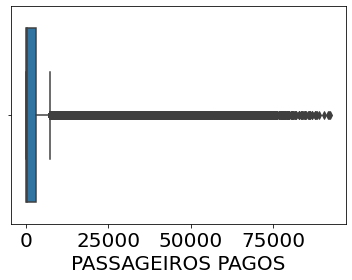

In [98]:
sns.boxplot(dataset_manaus_value)